In [3]:
#importing numpy and pandas

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# importing statsmodel and sklearn libraries for Linear regression model building

import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

#importing RFE library for feature selection and after this will perform manual feature selection.

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# importing libraries to check the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To supress warnings
import warnings
warnings.filterwarnings('ignore')



In [4]:
# Reading the day.csv file and assiging a dataframe bike.

bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
# shape of the bike df

bike.shape


(731, 16)

In [6]:
# information of the bike df

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
# Description of the bike df

bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
#check the datatypes 
bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [9]:
#check for null values in bike df

count=bike.isnull().sum()
print(count)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [10]:
# Add a days_old variable which indicates how old is the business
bike['days_old'] = (pd.to_datetime(bike['dteday'],format= '%Y-%m-%d') - pd.to_datetime('2011-01-01',format= '%Y-%m-%d')).dt.days

In [11]:
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,3
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,726
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,727
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,728
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,729


In [12]:
## dropping columns that are not relevant

# instant is just a row instance identifier
# dteday is removed as we have some of date features like mnth and year and weekday already in other columns
# casual and registered variables describe the target variable cnt target = casual + registered, which leads to data leakage

bike.drop(['instant','dteday','casual','registered'],axis = 1,inplace = True)
bike.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985,0
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801,1
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349,2
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562,3
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600,4


In [13]:
# mapping proper names so that data is properly categorized
# season (1:spring, 2:summer, 3:fall, 4:winter)

bike['season'] = bike['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [14]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985,0
1,spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801,1
2,spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349,2
3,spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562,3
4,spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600,4


In [15]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    object 
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  cnt         731 non-null    int64  
 12  days_old    731 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 74.4+ KB


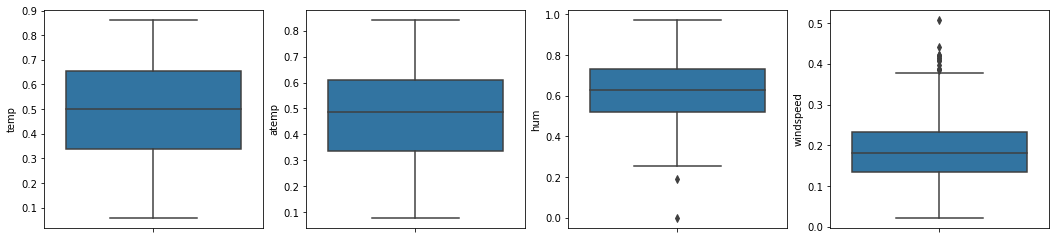

In [16]:
# Checking for outliars 

# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike)
    i+=1

In [17]:
# From the above box plots it is evidnet that there are no outliars

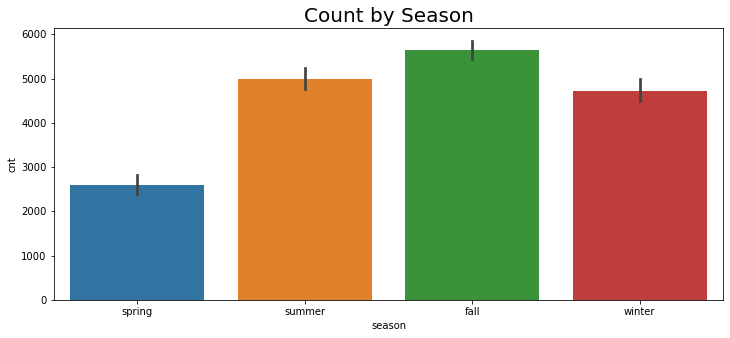

In [18]:
# Visualising Seasons count of rented bikes

plt.figure(figsize=[12,5])
sns.barplot(bike['season'],bike['cnt'])
plt.title('Count by Season', fontsize = 20)
plt.show()

In [19]:
# From the above bar plot it looks like people rent bikes in Fall the most.
# After Fall most amount of bikes are rented in summer and winter
# In spring least amount of bikes are rented

In [20]:
# mapping weathersit so that data is properly categorized
bike.weathersit = bike.weathersit.map({1:'Clear',2:'Cloudy',3:'Rain'})

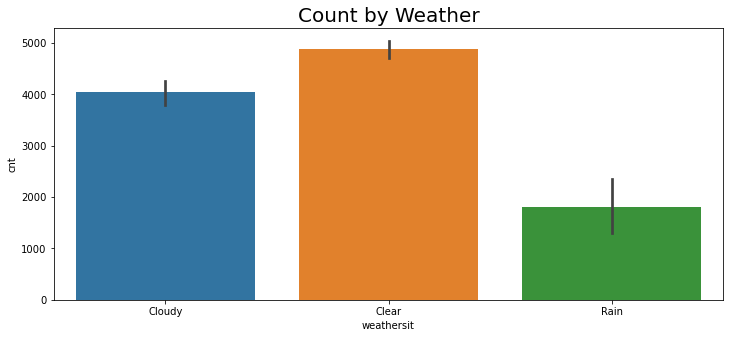

In [21]:
# Visualising weather count of rented bikes

plt.figure(figsize=[12,5])
sns.barplot(bike['weathersit'],bike['cnt'])
plt.title('Count by Weather', fontsize = 20)
plt.show()

In [22]:
# From bar plot it looks like people rent bikes in clear weather the most followed by cloudy amd rainy weather


In [23]:
# Mapping weekday varible with proper names for better categorization


bike['weekday'].replace({0:"sunday",1:"monday",2:"tuesday",3:"wednesday",4:"thursday",5:"friday",6:"saturday"},inplace=True)
bike.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,1,0,saturday,0,Cloudy,0.344167,0.363625,0.805833,0.160446,985,0
1,spring,0,1,0,sunday,0,Cloudy,0.363478,0.353739,0.696087,0.248539,801,1
2,spring,0,1,0,monday,1,Clear,0.196364,0.189405,0.437273,0.248309,1349,2
3,spring,0,1,0,tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,1562,3
4,spring,0,1,0,wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,1600,4
5,spring,0,1,0,thursday,1,Clear,0.204348,0.233209,0.518261,0.089565,1606,5
6,spring,0,1,0,friday,1,Cloudy,0.196522,0.208839,0.498696,0.168726,1510,6
7,spring,0,1,0,saturday,0,Cloudy,0.165000,0.162254,0.535833,0.266804,959,7
8,spring,0,1,0,sunday,0,Clear,0.138333,0.116175,0.434167,0.361950,822,8
9,spring,0,1,0,monday,1,Clear,0.150833,0.150888,0.482917,0.223267,1321,9


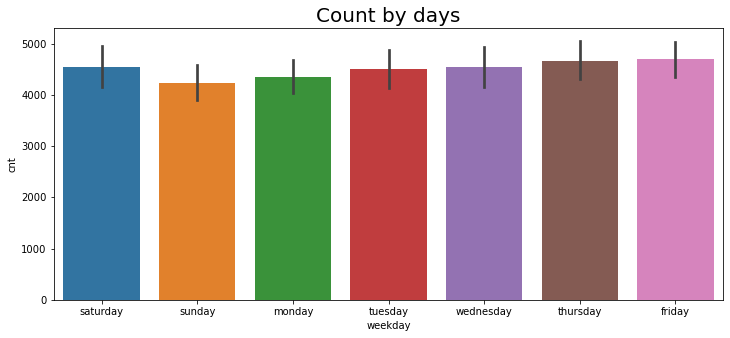

In [24]:
# Visualising weather count of rented bikes

plt.figure(figsize=[12,5])
sns.barplot(bike['weekday'],bike['cnt'])
plt.title('Count by days', fontsize = 20)
plt.show()

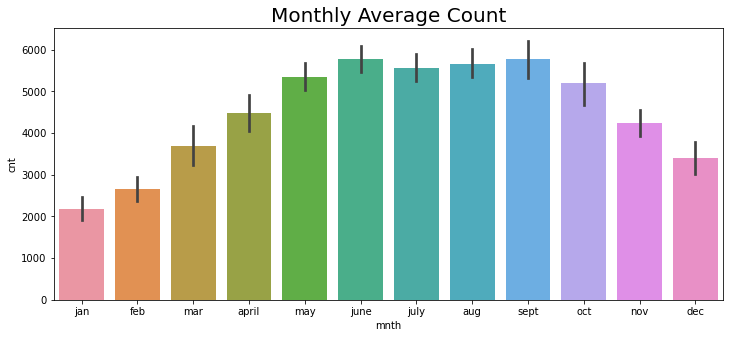

In [25]:
# mapping month varible with proper names for better categorization

bike['mnth'] = bike['mnth'].map({1:'jan',2:'feb',3:'mar',4:'april',5:'may',6:'june',7:'july',8:'aug',9:'sept',10:'oct',11:'nov',12:'dec'})


# Visualising Monthly count of rented bikes

plt.figure(figsize=[12,5])
sns.barplot(bike['mnth'],bike['cnt'])
plt.title('Monthly Average Count', fontsize = 20)
plt.show()

In [26]:
# From bar plot it looks like people rent bikes from June to Sept

In [27]:

# Check the dataframe now

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,saturday,0,Cloudy,0.344167,0.363625,0.805833,0.160446,985,0
1,spring,0,jan,0,sunday,0,Cloudy,0.363478,0.353739,0.696087,0.248539,801,1
2,spring,0,jan,0,monday,1,Clear,0.196364,0.189405,0.437273,0.248309,1349,2
3,spring,0,jan,0,tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,1562,3
4,spring,0,jan,0,wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,1600,4


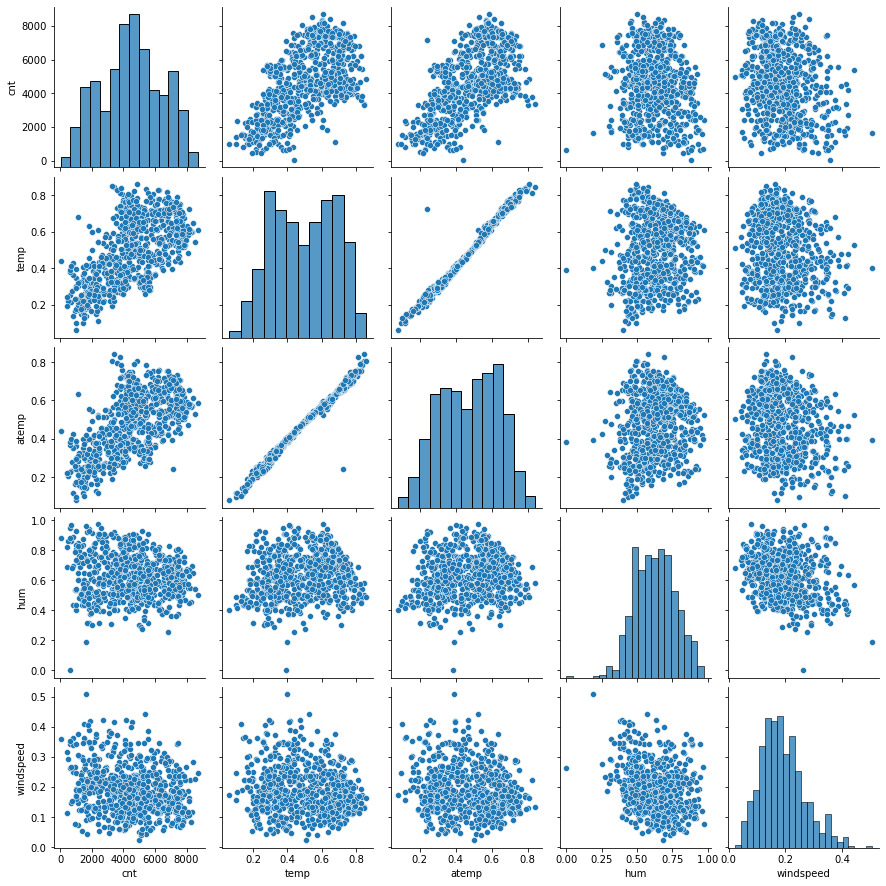

In [28]:

#Visualising Numeric Variables

sns.pairplot(data=bike,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

In [29]:
# It can be seen from above plots, there is some linear relation between temp, atemp with Count.
# temp and atemp are highly co-related with each other

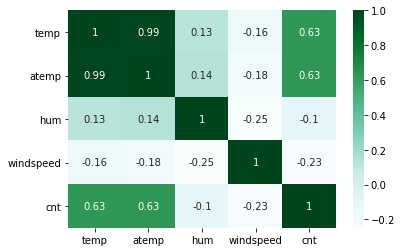

In [30]:
# Checking continuous variables relationship with each other
sns.heatmap(bike[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

In [31]:
#  temp and atemp has correlation more than .99 means almost 1 (highly correlated) 
# atemp seems to be derived from temp so atemp field can be dropped 

# Dropping atemp 
bike.drop(['atemp'], axis = 1, inplace = True)

In [32]:
# Check the dataframe now

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,saturday,0,Cloudy,0.344167,0.805833,0.160446,985,0
1,spring,0,jan,0,sunday,0,Cloudy,0.363478,0.696087,0.248539,801,1
2,spring,0,jan,0,monday,1,Clear,0.196364,0.437273,0.248309,1349,2
3,spring,0,jan,0,tuesday,1,Clear,0.200000,0.590435,0.160296,1562,3
4,spring,0,jan,0,wednesday,1,Clear,0.226957,0.436957,0.186900,1600,4


In [33]:
# create dummy variables for season , mnth, weekday and ,weathersit
dummy = bike[['season','mnth','weekday','weathersit']]

dummy = pd.get_dummies(dummy,drop_first=True )

## adding dummy variables to original dataset
bike = pd.concat([dummy,bike],axis = 1)

In [34]:
# Check the dataframe now

bike.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,...,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,days_old
0,1,0,0,0,0,0,1,0,0,0,...,jan,0,saturday,0,Cloudy,0.344167,0.805833,0.160446,985,0
1,1,0,0,0,0,0,1,0,0,0,...,jan,0,sunday,0,Cloudy,0.363478,0.696087,0.248539,801,1
2,1,0,0,0,0,0,1,0,0,0,...,jan,0,monday,1,Clear,0.196364,0.437273,0.248309,1349,2
3,1,0,0,0,0,0,1,0,0,0,...,jan,0,tuesday,1,Clear,0.200000,0.590435,0.160296,1562,3
4,1,0,0,0,0,0,1,0,0,0,...,jan,0,wednesday,1,Clear,0.226957,0.436957,0.186900,1600,4


In [35]:
## drop columns for which dummy variables were created
bike.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)

In [36]:
# Check the dataframe now

bike.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,...,weathersit_Cloudy,weathersit_Rain,yr,holiday,workingday,temp,hum,windspeed,cnt,days_old
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0.344167,0.805833,0.160446,985,0
1,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0.363478,0.696087,0.248539,801,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0.196364,0.437273,0.248309,1349,2
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0.200000,0.590435,0.160296,1562,3
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0.226957,0.436957,0.186900,1600,4


In [37]:
# split the data into two train and test dataframes

df_train_bike, df_test_bike = train_test_split(bike, train_size=0.70, random_state=100)

In [38]:
df_train_bike

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,...,weathersit_Cloudy,weathersit_Rain,yr,holiday,workingday,temp,hum,windspeed,cnt,days_old
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.730833,0.668750,0.153617,7105,576
426,1,0,0,0,0,0,0,0,0,1,...,1,0,1,0,1,0.353333,0.657083,0.144904,3194,426
729,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.255833,0.483333,0.350754,1796,729
482,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0.457500,0.400833,0.347633,6233,482
111,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0.336667,0.729583,0.219521,1683,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0.717500,0.677500,0.141179,7580,578
53,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0.221739,0.423043,0.094113,1917,53
350,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0.258333,0.560833,0.243167,2739,350
79,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0.430435,0.737391,0.288783,2077,79


In [39]:
df_test_bike

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,...,weathersit_Cloudy,weathersit_Rain,yr,holiday,workingday,temp,hum,windspeed,cnt,days_old
184,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0.726667,0.637917,0.081479,6043,184
535,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0.688333,0.690000,0.148017,6825,535
299,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0.470000,0.812917,0.197763,2659,299
221,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0.766667,0.424167,0.200258,4780,221
152,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0.715000,0.305000,0.292287,4968,152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,1,0.452500,0.767500,0.082721,6234,702
127,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.528333,0.631667,0.074637,4333,127
640,0,0,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0.590833,0.871667,0.104475,4639,640
72,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0.325217,0.496957,0.136926,2046,72


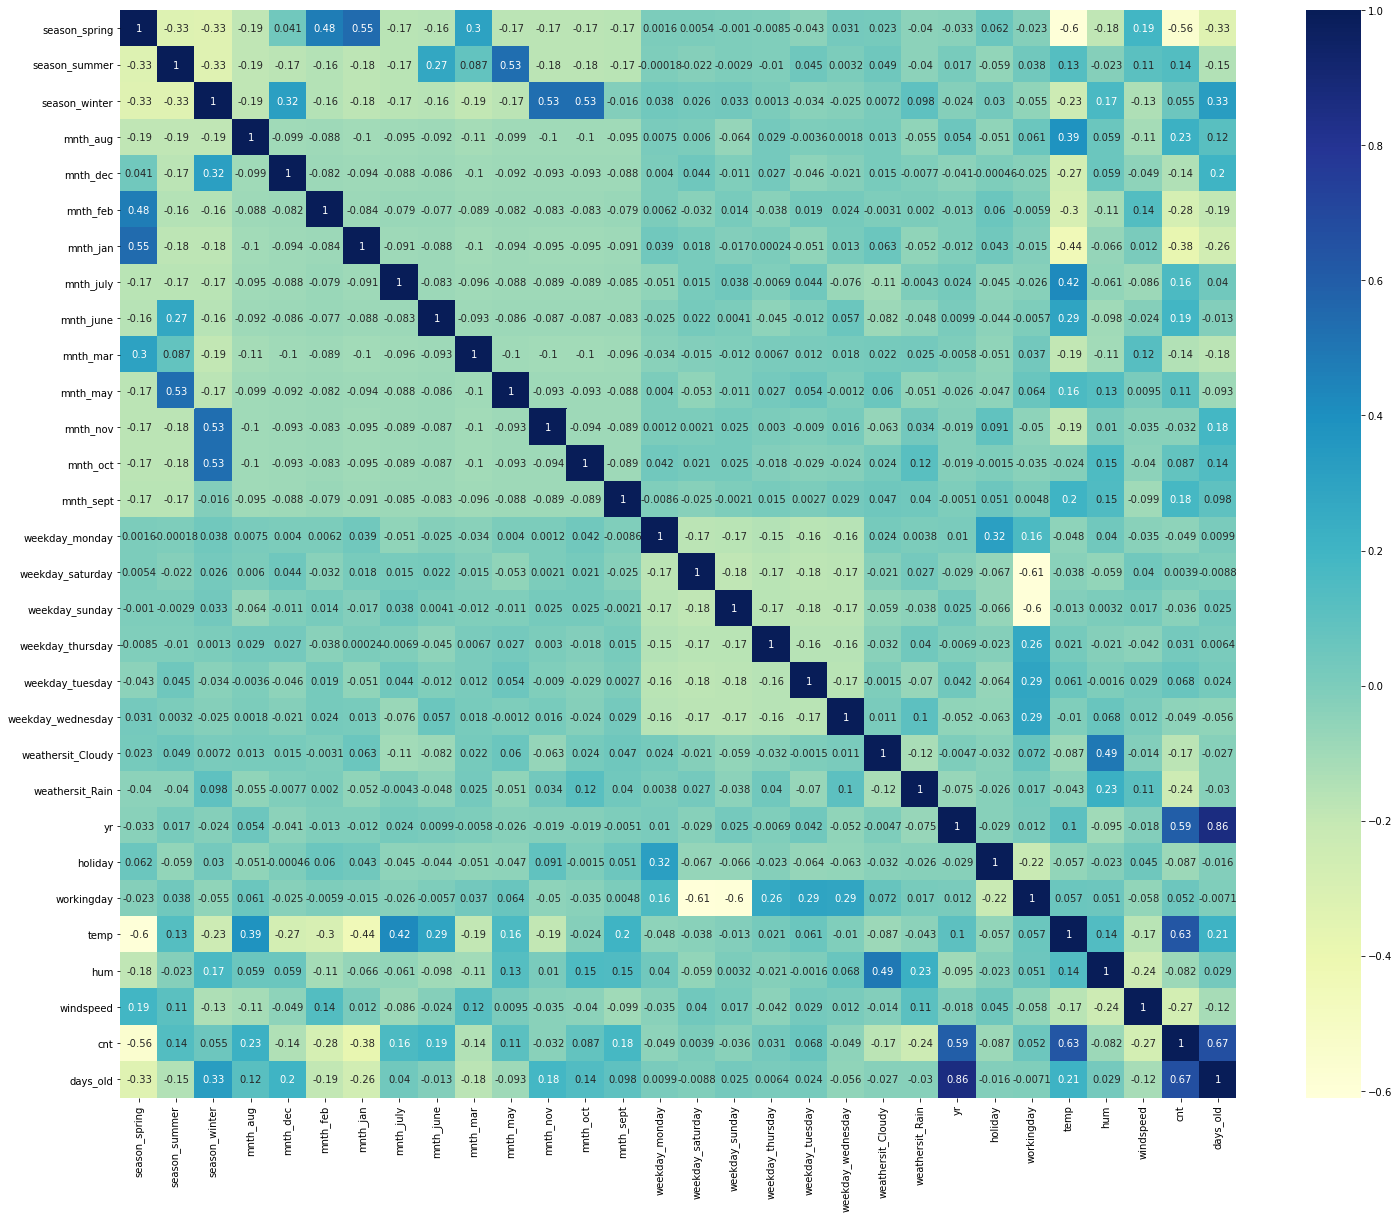

In [40]:
# checking the correlation coefficients to see which variables are highly correlated.

plt.figure(figsize = [25,20])
sns.heatmap(df_train_bike.corr(),annot =True, cmap= 'YlGnBu')
plt.show()

In [41]:
# It is seen from above heatmap that all variables have high collinearity with the target variable.

In [42]:
# importing MinMax scaler from sklearn library

from sklearn.preprocessing import MinMaxScaler


# Rescaling the Features
scaler = MinMaxScaler()

# Apply scaler to all the columns except the dummy variables.
scl_vars = ['cnt','hum','windspeed','temp']

df_train_bike[scl_vars] = scaler.fit_transform(df_train_bike[scl_vars])

In [43]:
df_train_bike.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,...,weathersit_Cloudy,weathersit_Rain,yr,holiday,workingday,temp,hum,windspeed,cnt,days_old
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.836974,0.689137,0.239301,0.814887,576
426,1,0,0,0,0,0,0,0,0,1,...,1,0,1,0,1,0.366591,0.677114,0.220569,0.364933,426
729,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.498067,0.663106,0.204096,729
482,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0.496388,0.413052,0.656397,0.714565,482
111,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0.345824,0.751824,0.380981,0.191095,111


In [44]:
# Building Model

y_train = df_train_bike.pop('cnt')
X_train = df_train_bike

In [45]:
# Building a linear model

# Running RFE with the output number of the variable equal to 13
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 13)             
rfe = rfe.fit(X_train, y_train)

In [46]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_spring', True, 1),
 ('season_summer', False, 9),
 ('season_winter', True, 1),
 ('mnth_aug', False, 14),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_july', True, 1),
 ('mnth_june', False, 13),
 ('mnth_mar', False, 12),
 ('mnth_may', False, 5),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 10),
 ('mnth_sept', False, 3),
 ('weekday_monday', False, 6),
 ('weekday_saturday', False, 7),
 ('weekday_sunday', False, 4),
 ('weekday_thursday', False, 16),
 ('weekday_tuesday', False, 11),
 ('weekday_wednesday', False, 15),
 ('weathersit_Cloudy', True, 1),
 ('weathersit_Rain', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', False, 17)]

In [47]:
# Starting with all the columns selected by RFE

# Model 1

# Print Columns selected by RFE. We will start with these columns for manual elimination
col = X_train.columns[rfe.support_]
col

Index(['season_spring', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_july',
       'mnth_nov', 'weathersit_Cloudy', 'weathersit_Rain', 'yr', 'holiday',
       'temp', 'hum', 'windspeed'],
      dtype='object')

In [48]:
X_train.columns[~rfe.support_]

Index(['season_summer', 'mnth_aug', 'mnth_feb', 'mnth_june', 'mnth_mar',
       'mnth_may', 'mnth_oct', 'mnth_sept', 'weekday_monday',
       'weekday_saturday', 'weekday_sunday', 'weekday_thursday',
       'weekday_tuesday', 'weekday_wednesday', 'workingday', 'days_old'],
      dtype='object')

In [49]:
# Creating new train dataframe with RFE selected features

X_train_rfe = X_train[col]
X_train_rfe.head()

,season_spring,season_winter,mnth_dec,mnth_jan,mnth_july,mnth_nov,weathersit_Cloudy,weathersit_Rain,yr,holiday,temp,hum,windspeed
576,0,0,0,0,1,0,0,0,1,0,0.836974,0.689137,0.239301
426,1,0,0,0,0,0,1,0,1,0,0.366591,0.677114,0.220569
729,1,0,1,0,0,0,0,0,1,0,0.245101,0.498067,0.663106
482,0,0,0,0,0,0,0,0,1,0,0.496388,0.413052,0.656397
111,0,0,0,0,0,0,1,0,0,0,0.345824,0.751824,0.380981


In [50]:
# Adding a constant variable 
 
#X_train_rfe = sm.add_constant(X_train_rfe)

In [51]:
# Create a first fitted model
#lm = sm.OLS(y_train,X_train_rfe).fit()

# importing statsmodels to add constant/intercept.

import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.2
Date:                Tue, 22 Mar 2022   Prob (F-statistic):          1.81e-191
Time:                        06:04:21   Log-Likelihood:                 512.96
No. Observations:                 511   AIC:                            -997.9
Df Residuals:                     497   BIC:                            -938.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3823      0.031     12.428      0.000       0.322       0.443
season_spring        -0.1123      0.015     -7.342      0.000      -0.142      -0.082
season_winter         0.0792      0.014      5.618      0.000       0.051       0.107
mnth_dec             -0.0529      0.017     -3.091      0.002      -0.087      -0.019
mnth_jan             -0.0485      0.018     -2.708      0.007      -0.084      -0.013
mnth_july            -0.0839      0.017     -4.981      0.000      -0.117      -0.051
mnth_nov             -0.0621      0.018     -3.379      0.001      -0.098      -0.026
weathersit_Cloudy    -0.0515      0.011     -4.880      0.000      -0.072      -0.031
weathersit_Rain      -0.2439      0.027     -8.966      0.000      -0.297      -0.190
yr                    0.2322      0.008     28.641      0.000       0.216       0.248
holiday              -0.0551      0.027     -2.075      0.039      -0.107      -0.003
temp                  0.4381      0.032     13.513      0.000       0.374       0.502
hum                  -0.1605      0.037     -4.367      0.000      -0.233      -0.088
windspeed            -0.1951      0.026     -7.436      0.000      -0.247      -0.144
==============================================================================
Omnibus:                       80.172   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.636
Skew:                          -0.819   Prob(JB):                     1.09e-41
Kurtosis:                       5.485   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:


# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,hum,24.21
10,temp,16.42
12,windspeed,4.20
0,season_spring,2.94
1,season_winter,2.94
6,weathersit_Cloudy,2.33
8,yr,2.07
5,mnth_nov,1.80
3,mnth_jan,1.73
2,mnth_dec,1.52


In [53]:
#Model 2

# Remove feature - Humidity due very high VIF values as all the p-values < 0.05.


X_train_rfe2 = X_train_rfe.drop('hum', axis = 1)

# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe2)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     216.1
Date:                Tue, 22 Mar 2022   Prob (F-statistic):          1.34e-188
Time:                        06:04:25   Log-Likelihood:                 503.34
No. Observations:                 511   AIC:                            -980.7
Df Residuals:                     498   BIC:                            -925.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3018      0.025     12.041      0.000       0.253       0.351
season_spring        -0.1163      0.016     -7.483      0.000      -0.147      -0.086
season_winter         0.0696      0.014      4.913      0.000       0.042       0.097
mnth_dec             -0.0596      0.017     -3.436      0.001      -0.094      -0.026
mnth_jan             -0.0543      0.018     -2.988      0.003      -0.090      -0.019
mnth_july            -0.0736      0.017     -4.337      0.000      -0.107      -0.040
mnth_nov             -0.0637      0.019     -3.402      0.001      -0.100      -0.027
weathersit_Cloudy    -0.0785      0.009     -9.026      0.000      -0.096      -0.061
weathersit_Rain      -0.2901      0.026    -11.371      0.000      -0.340      -0.240
yr                    0.2368      0.008     28.935      0.000       0.221       0.253
holiday              -0.0566      0.027     -2.096      0.037      -0.110      -0.004
temp                  0.3997      0.032     12.582      0.000       0.337       0.462
windspeed            -0.1662      0.026     -6.431      0.000      -0.217      -0.115
==============================================================================
Omnibus:                       81.464   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.708
Skew:                          -0.826   Prob(JB):                     5.24e-43
Kurtosis:                       5.533   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:


# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,4.43
11,windspeed,4.18
1,season_winter,2.51
0,season_spring,2.37
8,yr,2.06
5,mnth_nov,1.77
3,mnth_jan,1.63
6,weathersit_Cloudy,1.54
2,mnth_dec,1.45
4,mnth_july,1.33


In [55]:
#Model 3

# remove feature - temp  due very high VIF 


X_train_rfe3 = X_train_rfe2.drop('temp', axis = 1)

# Add a constant
X_train_lm3 = sm.add_constant(X_train_rfe3)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

lr3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     168.3
Date:                Tue, 22 Mar 2022   Prob (F-statistic):          5.23e-160
Time:                        06:04:25   Log-Likelihood:                 432.81
No. Observations:                 511   AIC:                            -841.6
Df Residuals:                     499   BIC:                            -790.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5817      0.013     43.958      0.000       0.556       0.608
season_spring        -0.2327      0.014    -16.246      0.000      -0.261      -0.205
season_winter         0.0111      0.015      0.723      0.470      -0.019       0.041
mnth_dec             -0.1166      0.019     -6.073      0.000      -0.154      -0.079
mnth_jan             -0.1185      0.020     -5.930      0.000      -0.158      -0.079
mnth_july             0.0020      0.018      0.110      0.913      -0.034       0.038
mnth_nov             -0.1158      0.021     -5.531      0.000      -0.157      -0.075
weathersit_Cloudy    -0.0876      0.010     -8.817      0.000      -0.107      -0.068
weathersit_Rain      -0.3094      0.029    -10.595      0.000      -0.367      -0.252
yr                    0.2471      0.009     26.468      0.000       0.229       0.265
holiday              -0.0436      0.031     -1.408      0.160      -0.104       0.017
windspeed            -0.2144      0.029     -7.312      0.000      -0.272      -0.157
==============================================================================
Omnibus:                       67.522   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.874
Skew:                          -0.779   Prob(JB):                     4.64e-28
Kurtosis:                       4.866   Cond. No.                         9.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
X_train_rfe3

,season_spring,season_winter,mnth_dec,mnth_jan,mnth_july,mnth_nov,weathersit_Cloudy,weathersit_Rain,yr,holiday,windspeed
576,0,0,0,0,1,0,0,0,1,0,0.239301
426,1,0,0,0,0,0,1,0,1,0,0.220569
729,1,0,1,0,0,0,0,0,1,0,0.663106
482,0,0,0,0,0,0,0,0,1,0,0.656397
111,0,0,0,0,0,0,1,0,0,0,0.380981
...,...,...,...,...,...,...,...,...,...,...,...
578,0,0,0,0,0,0,0,0,1,0,0.212561
53,1,0,0,0,0,0,0,0,0,0,0.111379
350,0,1,1,0,0,0,1,0,0,0,0.431816
79,0,0,0,0,0,0,1,0,0,0,0.529881


In [57]:


# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,windspeed,2.63
1,season_winter,2.49
0,season_spring,2.27
5,mnth_nov,1.75
8,yr,1.75
3,mnth_jan,1.62
6,weathersit_Cloudy,1.46
2,mnth_dec,1.44
4,mnth_july,1.10
7,weathersit_Rain,1.08


In [58]:
#Model 4

# remove feature - mnth_july  due very high p value 


X_train_rfe4 = X_train_rfe3.drop('mnth_july', axis = 1)

# Add a constant
X_train_lm4 = sm.add_constant(X_train_rfe4)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

lr4.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     185.5
Date:                Tue, 22 Mar 2022   Prob (F-statistic):          3.76e-161
Time:                        06:04:26   Log-Likelihood:                 432.80
No. Observations:                 511   AIC:                            -843.6
Df Residuals:                     500   BIC:                            -797.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5822      0.013     45.985      0.000       0.557       0.607
season_spring        -0.2330      0.014    -16.553      0.000      -0.261      -0.205
season_winter         0.0108      0.015      0.716      0.474      -0.019       0.040
mnth_dec             -0.1167      0.019     -6.079      0.000      -0.154      -0.079
mnth_jan             -0.1185      0.020     -5.936      0.000      -0.158      -0.079
mnth_nov             -0.1158      0.021     -5.537      0.000      -0.157      -0.075
weathersit_Cloudy    -0.0877      0.010     -8.885      0.000      -0.107      -0.068
weathersit_Rain      -0.3094      0.029    -10.605      0.000      -0.367      -0.252
yr                    0.2471      0.009     26.496      0.000       0.229       0.265
holiday              -0.0437      0.031     -1.412      0.159      -0.104       0.017
windspeed            -0.2146      0.029     -7.349      0.000      -0.272      -0.157
==============================================================================
Omnibus:                       67.553   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.914
Skew:                          -0.780   Prob(JB):                     4.55e-28
Kurtosis:                       4.866   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:


# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,windspeed,2.54
1,season_winter,2.46
0,season_spring,2.23
4,mnth_nov,1.75
7,yr,1.72
3,mnth_jan,1.62
5,weathersit_Cloudy,1.46
2,mnth_dec,1.44
6,weathersit_Rain,1.08
8,holiday,1.04


In [60]:
#Model 5

# remove feature - season_winter  due very high p value 


X_train_rfe5 = X_train_rfe4.drop('season_winter', axis = 1)

# Add a constant
X_train_lm5 = sm.add_constant(X_train_rfe5)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

lr5.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     206.2
Date:                Tue, 22 Mar 2022   Prob (F-statistic):          3.28e-162
Time:                        06:04:26   Log-Likelihood:                 432.54
No. Observations:                 511   AIC:                            -845.1
Df Residuals:                     501   BIC:                            -802.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5844      0.012     47.730      0.000       0.560       0.609
season_spring        -0.2359      0.013    -17.517      0.000      -0.262      -0.209
mnth_dec             -0.1103      0.017     -6.484      0.000      -0.144      -0.077
mnth_jan             -0.1176      0.020     -5.905      0.000      -0.157      -0.078
mnth_nov             -0.1071      0.017     -6.306      0.000      -0.140      -0.074
weathersit_Cloudy    -0.0873      0.010     -8.861      0.000      -0.107      -0.068
weathersit_Rain      -0.3069      0.029    -10.600      0.000      -0.364      -0.250
yr                    0.2471      0.009     26.509      0.000       0.229       0.265
holiday              -0.0436      0.031     -1.409      0.159      -0.104       0.017
windspeed            -0.2161      0.029     -7.425      0.000      -0.273      -0.159
==============================================================================
Omnibus:                       65.071   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.355
Skew:                          -0.767   Prob(JB):                     3.29e-26
Kurtosis:                       4.777   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
#Model 6

# remove feature - holiday  due very high p value 


X_train_rfe6 = X_train_rfe5.drop('holiday', axis = 1)

# Add a constant
X_train_lm6 = sm.add_constant(X_train_rfe6)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

lr6.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     231.3
Date:                Tue, 22 Mar 2022   Prob (F-statistic):          5.61e-163
Time:                        06:04:26   Log-Likelihood:                 431.53
No. Observations:                 511   AIC:                            -845.1
Df Residuals:                     502   BIC:                            -806.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5841      0.012     47.664      0.000       0.560       0.608
season_spring        -0.2368      0.013    -17.587      0.000      -0.263      -0.210
mnth_dec             -0.1105      0.017     -6.491      0.000      -0.144      -0.077
mnth_jan             -0.1181      0.020     -5.924      0.000      -0.157      -0.079
mnth_nov             -0.1095      0.017     -6.477      0.000      -0.143      -0.076
weathersit_Cloudy    -0.0868      0.010     -8.812      0.000      -0.106      -0.067
weathersit_Rain      -0.3054      0.029    -10.546      0.000      -0.362      -0.249
yr                    0.2475      0.009     26.529      0.000       0.229       0.266
windspeed            -0.2178      0.029     -7.479      0.000      -0.275      -0.161
==============================================================================
Omnibus:                       64.149   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.137
Skew:                          -0.759   Prob(JB):                     9.96e-26
Kurtosis:                       4.761   Cond. No.                         8.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,windspeed,2.47
0,season_spring,2.06
6,yr,1.70
2,mnth_jan,1.61
4,weathersit_Cloudy,1.43
3,mnth_nov,1.10
1,mnth_dec,1.09
5,weathersit_Rain,1.06


In [63]:
# Model Interpretation

# The F-Statistics value of 231.3 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

# R-squared:0.787 - 78.7% of the data fit the regression model.This is good.  
    
# Adj. R-squared:0.783 -  Indicates that 78.3% of the variation in the output variables are explained by the input variables.
    
# The equation that fit Model given below:
# cnt = 0.5841 - 0.2368 * season_spring - 0.1105 * mnth_dec - 0.1181 * mnth_jan 
#     - 0.1095 * mnth_nov -  0.0868 * weathersit_Cloudy - 0.3054 * weathersit_Rain +  0.2475 * yr - 0.2178 * windspeed


# We will consider this as our final model

In [64]:
# Residual Analysis of the train data

y_train_cnt = lm.predict(X_train)

Text(0.5, 0, 'Errors')

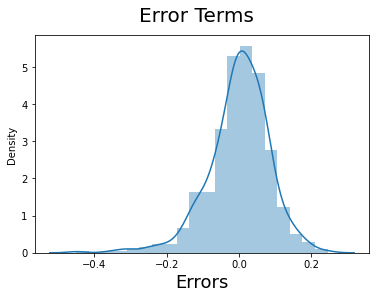

In [65]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [67]:
# Making Predictions Using the Final Model

num_vars = ['cnt','hum','windspeed','temp']


df_test_bike[num_vars] = scaler.transform(df_test_bike[num_vars])

In [68]:
df_test_bike.describe()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,...,weathersit_Cloudy,weathersit_Rain,yr,holiday,workingday,temp,hum,windspeed,cnt,days_old
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.254545,0.263636,0.231818,0.059091,0.086364,0.100000,0.077273,0.100000,0.100000,0.054545,...,0.313636,0.031818,0.481818,0.040909,0.722727,0.559826,0.643464,0.319953,0.517140,357.177273
std,0.436599,0.441609,0.422956,0.236333,0.281541,0.300684,0.267633,0.300684,0.300684,0.227609,...,0.465029,0.175916,0.500809,0.198531,0.448673,0.229773,0.142479,0.169883,0.217540,214.201609
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.314298,-0.042808,0.048205,3.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.353871,0.544439,0.198841,0.374885,170.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.564921,0.637548,0.302796,0.522492,349.500000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.766365,0.740026,0.418445,0.668891,538.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.858328,0.981707,730.000000


In [69]:

#Dividing into X_test and y_test

y_test = df_test_bike.pop('cnt')
X_test = df_test_bike

X_test = df_test_bike
print(y_test.shape)
print(X_test.shape)

(220,)
(220, 29)


In [72]:
#Selecting the variables that were part of final model (Model 6).
col_test = X_train_rfe6.columns

X_test = X_test[col_test]

# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)


In [73]:
X_test_lm6.head()

,const,season_spring,mnth_dec,mnth_jan,mnth_nov,weathersit_Cloudy,weathersit_Rain,yr,windspeed
184,1.0,0,0,0,0,1,0,0,0.084219
535,1.0,0,0,0,0,0,0,1,0.227262
299,1.0,0,0,0,0,1,0,0,0.334206
221,1.0,0,0,0,0,0,0,0,0.339570
152,1.0,0,0,0,0,0,0,0,0.537414


In [74]:
# Making predictions using the final model (lr6)

y_test_pred = lr6.predict(X_test_lm6)

Text(0, 0.5, 'y_test_pred')

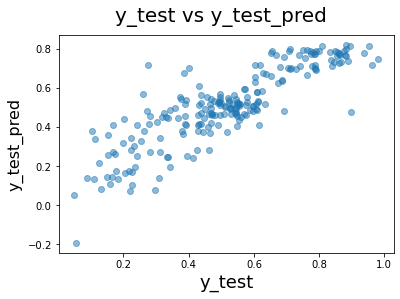

In [75]:
# Model Evalution 

# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16) 

In [259]:
# We can see from obove that there is linear relationship between y_test and y_test_pred


In [77]:
from sklearn.metrics import r2_score

r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_cnt)

print('Test data r^2 :',round((r2_test*100),2))
print('Train data r^2 :',round((r2_train*100),2))

Test data r^2 : 74.09
Train data r^2 : 85.65


In [78]:
# n for test data ,n1 for train data is number of rows
n = X_test.shape[0]
n1 = X_train_rfe6.shape[0]

# Number of features (predictors, p for test data, p1 for train data) is the number of columns
p = X_test.shape[1]
p1 = X_train_rfe6.shape[1]


# We find the Adjusted R-squared using the formula

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_train = 1-(1-r2_train)*(n1-1)/(n1-p1-1)

print('Test data adjusted r^2 :',round((adjusted_r2_test*100),2))
print('Train data adjusted r^2 :',round((adjusted_r2_train*100),2))

Test data adjusted r^2 : 73.1
Train data adjusted r^2 : 85.42


In [79]:
# FINAL RESULT COMPARISON:
# Test data r^2 : 74.09

# Train data r^2 : 85.65

# Test data adjusted r^2 : 73.1

# Train data adjusted r^2 : 85.42

# This looks like a very good model based upon above high R-squared and Adj. R-squared

   
#The equation that fit Model 2 id given below:

# cnt = 0.5841 - 0.2368 * season_spring - 0.1105 * mnth_dec - 0.1181 * mnth_jan 
#     - 0.1095 * mnth_nov -  0.0868 * weathersit_Cloudy - 0.3054 * weathersit_Rain +  0.2475 * yr - 0.2178 * windspeed

# As per our final Model, the below predictor variables influences bike booking :

# season_spring 
# mnth_dec
# mnth_jan
# mnth_nov
# weathersit_Cloudy
# weathersit_Rain
# windspeed

